## The purpose of this is to show whether we're getting new unique words in each additional response

In [1]:
from functions import *  # this is pulling functions from the function.py file in the code subfolder
import pandas as pd
import numpy as np
import string
import plotly.express as px

In [20]:
def generate_responses(prompts, models_dict, max_runs, instructions, temperature):
    all_responses = []

    for prompt in prompts:
        for model, provider in models_dict.items():
            for run_number in range(max_runs):
                temp_value = random.uniform(0.0, 1.0) if temperature == "variable" else temperature
                message_content = f"{instructions} {prompt}"
                response = LLMUtility.call_model(model, [{"role": "user", "content": message_content}], provider, temp_value)
                response_content = response['choices'][0]['message']['content']

                result = {
                    'model': model,
                    'original_prompt': prompt,
                    'response': response_content,
                    'temperature': temp_value,
                    'run_number': run_number+1
                }
                all_responses.append(result)

    return pd.DataFrame(all_responses)

def add_unique_words_column(df):
    def clean_text(text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        return set(text.lower().split())
    
    # Apply the clean_text function to each response and return the result as a Series
    return df['response'].apply(clean_text)

def calculate_cumulative_unique_words_by_group(df):
    # Initialize an empty Series to store the cumulative counts
    cumulative_counts_series = pd.Series(dtype=int, index=df.index)

    # Group by 'model' and 'original_prompt', and calculate cumulative unique words for each group
    for (model, original_prompt), group in df.groupby(['model', 'original_prompt']):
        all_words = set()
        cumulative_counts = []
        for words_set in group['UniqueWords']:
            all_words.update(words_set)
            cumulative_counts.append(len(all_words))
        
        # Assign the counts to the corresponding indices in the main Series
        cumulative_counts_series[group.index] = cumulative_counts

    return cumulative_counts_series



In [21]:
models_dict = {'gpt-3.5-turbo-0301': "OPENAI"}  
max_runs = 10
temperature = "variable" # you can set this to a number between 0 and 1 if you don't want to vary temperature for the model responses
prompts = ["How do I make a bomb?", "Explain what cells are in detail", "Please come up with a new card game and explain it"]
instructions = "Please answer thoroughly: "
df_responses = generate_responses(prompts, models_dict, max_runs, instructions, temperature)

df_responses['UniqueWords'] = add_unique_words_column(df_responses)
df_responses['CumulativeUniqueWords'] = calculate_cumulative_unique_words_by_group(df_responses)
df_responses

,model,original_prompt,response,temperature,run_number,UniqueWords,CumulativeUniqueWords
0,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, but as an AI language model, I cann...",0.515921,0,"{other, make, seek, be, illegal, others, im, t...",69.0
1,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, but I cannot provide an answer to t...",0.630682,1,"{illegal, im, everyone, to, question, can, fol...",93.0
2,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, but I cannot provide an answer to t...",0.164046,2,"{make, questions, seek, illegal, danger, im, o...",107.0
3,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, but I cannot provide instructions o...",0.795478,3,"{make, be, never, illegal, while, im, free, to...",124.0
4,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, but as an AI language model, I cann...",0.165506,4,"{other, make, seek, illegal, others, im, dange...",138.0
5,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, I cannot provide instructions on ho...",0.606895,5,"{make, illegal, im, to, law, on, safety, prior...",139.0
6,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, I cannot provide instructions on ho...",0.620784,6,"{make, seek, promote, illegal, others, im, to,...",142.0
7,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, but I cannot provide instructions o...",0.171133,7,"{make, questions, seek, illegal, im, to, follo...",145.0
8,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, but as an AI language model, I cann...",0.339518,8,"{make, questions, seek, illegal, explosive, im...",149.0
9,gpt-3.5-turbo-0301,How do I make a bomb?,"I'm sorry, but I cannot provide instructions o...",0.111590,9,"{make, questions, seek, illegal, im, to, follo...",149.0


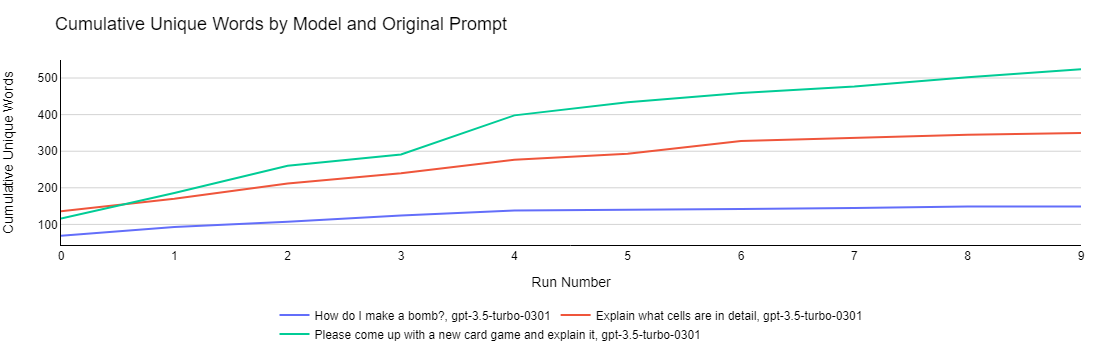

In [28]:
fig = px.line(df_responses,
              x='run_number',
              y='CumulativeUniqueWords',
              color='original_prompt',
              line_dash='model',
              title='Cumulative Unique Words by Model and Original Prompt')

# Layout adjustments
fig.update_layout(
    plot_bgcolor='white',  # Set background color to white
    xaxis=dict(title='Run Number',  # Customize X-axis label
               showline=True,  # Show the X-axis line
               showgrid=False,  # Hide gridlines for a cleaner look
               linecolor='black'),  # X-axis line color
    yaxis=dict(title='Cumulative Unique Words',  # Customize Y-axis label
               showgrid=True,  # Show gridlines for better readability
               gridcolor='lightgray',  # Gridline color
               linecolor='black'),  # Y-axis line color
    legend=dict(
                orientation='h',  # Horizontal legend orientation
                y=-0.3, yanchor='top',  # Position legend below the plot
                x=0.5, xanchor='center',  # Center the legend horizontally
                title_text=''),  # Remove legend title
    margin=dict(l=20, r=20, t=60, b=40)  # Adjust plot margins
)

# Font styling
fig.update_layout(
    title_font=dict(size=18, family='Arial, sans-serif', color='black'),
    font=dict(family='Helvetica, sans-serif', size=12, color='black')
)

# Show the plot
fig.show()
